In [16]:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
## Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
## City, country, and date
## Latitude and longitude
## Maximum temperature
## Humidity
## Cloudiness
## Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [17]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7d2fdac019530977e79a366e41938987


In [8]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(10.931668326943438, -167.55837632986066),
 (-69.62356707469303, -54.95005560514272),
 (70.2387958490022, -15.158168855295656),
 (-43.74263389499694, -48.74193751739216),
 (67.90523398147144, 47.123494121692175),
 (-46.91457532557207, 167.83047736409424),
 (30.96799816652249, -133.31921755974395),
 (48.00828292386484, 178.99709900101794),
 (58.63883803474474, 36.43996457996781),
 (-77.87964011176095, -165.34824327092826),
 (0.005411184268382385, 103.6033750261563),
 (50.24582527354002, -162.30070662356644),
 (31.69668326311104, -6.089349258549731),
 (66.63612585736004, -127.4082578552929),
 (66.45474495482577, 169.51189215240328),
 (-75.27490584196192, 73.88161469349706),
 (69.40212607824725, 10.363057883217522),
 (80.9006032094903, -58.49771127617997),
 (88.24743729417236, 83.73675295967621),
 (1.3673545596924868, -169.61169658675487),
 (-71.97410314054318, 138.0387986571601),
 (37.003174929155264, 162.77301272105973),
 (-80.78855660103578, 113.88887711631094),
 (-50.877424159242224,

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | husavik
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | leshukonskoye
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | half moon bay
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | sandovo
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | mendahara
City not found. Skipping...
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | mrirt
City not found. Skipping...
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | sorland
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...
Processing Record 21 of Set 1 | hobar

Processing Record 37 of Set 4 | okhotsk
Processing Record 38 of Set 4 | schaffhausen
Processing Record 39 of Set 4 | kolyvan
Processing Record 40 of Set 4 | newtonmore
Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | luderitz
Processing Record 43 of Set 4 | saint-pierre
Processing Record 44 of Set 4 | udachnyy
Processing Record 45 of Set 4 | hervey bay
Processing Record 46 of Set 4 | thompson
Processing Record 47 of Set 4 | nara
Processing Record 48 of Set 4 | pecos
Processing Record 49 of Set 4 | tilichiki
Processing Record 50 of Set 4 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | cairns
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | marsaxlokk
Processing Record 4 of Set 5 | sept-iles
Processing Record 5 of Set 5 | ketchikan
Processing Record 6 of Set 5 | litoral del san juan
City not found. Skipping...
Processing Record 7 of Set 5 | banda aceh
Processing Record 8 of Set 5 | kenai
Processing Record 9 of Set 

Processing Record 21 of Set 8 | yenotayevka
Processing Record 22 of Set 8 | chaa-khol
City not found. Skipping...
Processing Record 23 of Set 8 | grootfontein
Processing Record 24 of Set 8 | meiringen
Processing Record 25 of Set 8 | alekseyevsk
Processing Record 26 of Set 8 | oktyabrskoye
Processing Record 27 of Set 8 | drumnadrochit
Processing Record 28 of Set 8 | crab hill
City not found. Skipping...
Processing Record 29 of Set 8 | cabral
Processing Record 30 of Set 8 | longyearbyen
Processing Record 31 of Set 8 | port-cartier
Processing Record 32 of Set 8 | north bend
Processing Record 33 of Set 8 | riacho de santana
Processing Record 34 of Set 8 | kaeo
Processing Record 35 of Set 8 | paducah
Processing Record 36 of Set 8 | eskasem
City not found. Skipping...
Processing Record 37 of Set 8 | visby
Processing Record 38 of Set 8 | sur
Processing Record 39 of Set 8 | nador
Processing Record 40 of Set 8 | lodwar
Processing Record 41 of Set 8 | wulanhaote
City not found. Skipping...
Proce

Processing Record 8 of Set 12 | alotau
City not found. Skipping...
Processing Record 9 of Set 12 | bolivar
Processing Record 10 of Set 12 | kiunga
Processing Record 11 of Set 12 | saint-augustin
Processing Record 12 of Set 12 | tahoua
Processing Record 13 of Set 12 | hami
Processing Record 14 of Set 12 | hailey
Processing Record 15 of Set 12 | chifeng
Processing Record 16 of Set 12 | cairo
Processing Record 17 of Set 12 | noumea
Processing Record 18 of Set 12 | pasaje
Processing Record 19 of Set 12 | severo-yeniseyskiy
Processing Record 20 of Set 12 | lasa
Processing Record 21 of Set 12 | buenos aires
Processing Record 22 of Set 12 | gaoua
Processing Record 23 of Set 12 | orzhytsya
Processing Record 24 of Set 12 | kedougou
Processing Record 25 of Set 12 | filingue
Processing Record 26 of Set 12 | tadine
Processing Record 27 of Set 12 | omsukchan
Processing Record 28 of Set 12 | burica
City not found. Skipping...
Processing Record 29 of Set 12 | sault sainte marie
Processing Record 30 o

In [22]:
len(city_data)

563

In [23]:
city_data

[{'City': 'Kapaa',
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 78.8,
  'Humidity': 65,
  'Cloudiness': 20,
  'Wind Speed': 6.93,
  'Country': 'US',
  'Date': '2020-02-22 21:42:13'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 69.8,
  'Humidity': 52,
  'Cloudiness': 75,
  'Wind Speed': 9.17,
  'Country': 'AR',
  'Date': '2020-02-22 21:41:49'},
 {'City': 'Husavik',
  'Lat': 66.04,
  'Lng': -17.34,
  'Max Temp': 21.94,
  'Humidity': 87,
  'Cloudiness': 100,
  'Wind Speed': 10.38,
  'Country': 'IS',
  'Date': '2020-02-22 21:43:43'},
 {'City': 'Mar Del Plata',
  'Lat': -38,
  'Lng': -57.56,
  'Max Temp': 62.6,
  'Humidity': 67,
  'Cloudiness': 0,
  'Wind Speed': 13.87,
  'Country': 'AR',
  'Date': '2020-02-22 21:43:07'},
 {'City': 'Leshukonskoye',
  'Lat': 64.9,
  'Lng': 45.76,
  'Max Temp': 33.04,
  'Humidity': 82,
  'Cloudiness': 100,
  'Wind Speed': 16.71,
  'Country': 'RU',
  'Date': '2020-02-22 21:43:43'},
 {'City': 'Bluff',
  'Lat': -46.6,
  'Lng': 168.33,
 

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,78.80,65,20,6.93,US,2020-02-22 21:42:13
1,Ushuaia,-54.80,-68.30,69.80,52,75,9.17,AR,2020-02-22 21:41:49
2,Husavik,66.04,-17.34,21.94,87,100,10.38,IS,2020-02-22 21:43:43
3,Mar Del Plata,-38.00,-57.56,62.60,67,0,13.87,AR,2020-02-22 21:43:07
4,Leshukonskoye,64.90,45.76,33.04,82,100,16.71,RU,2020-02-22 21:43:43
...,...,...,...,...,...,...,...,...,...
558,Merke,42.87,73.18,33.12,98,100,3.96,KZ,2020-02-22 21:43:39
559,Bull Savanna,17.89,-77.59,76.78,72,94,5.32,JM,2020-02-22 21:45:57
560,Miri,4.41,114.01,77.00,94,75,5.82,MY,2020-02-22 21:44:01
561,Isangel,-19.55,169.27,82.40,78,20,16.35,VU,2020-02-22 21:45:57


In [25]:
reorder = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[reorder]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-02-22 21:42:13,22.08,-159.32,78.80,65,20,6.93
1,Ushuaia,AR,2020-02-22 21:41:49,-54.80,-68.30,69.80,52,75,9.17
2,Husavik,IS,2020-02-22 21:43:43,66.04,-17.34,21.94,87,100,10.38
3,Mar Del Plata,AR,2020-02-22 21:43:07,-38.00,-57.56,62.60,67,0,13.87
4,Leshukonskoye,RU,2020-02-22 21:43:43,64.90,45.76,33.04,82,100,16.71
...,...,...,...,...,...,...,...,...,...
558,Merke,KZ,2020-02-22 21:43:39,42.87,73.18,33.12,98,100,3.96
559,Bull Savanna,JM,2020-02-22 21:45:57,17.89,-77.59,76.78,72,94,5.32
560,Miri,MY,2020-02-22 21:44:01,4.41,114.01,77.00,94,75,5.82
561,Isangel,VU,2020-02-22 21:45:57,-19.55,169.27,82.40,78,20,16.35


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [30]:
# Import the time module.
import time

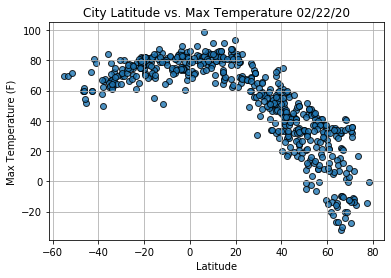

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

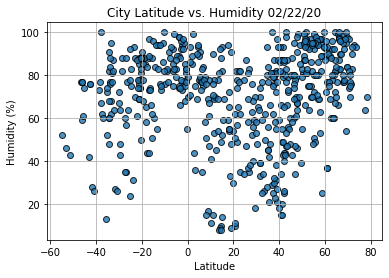

In [32]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

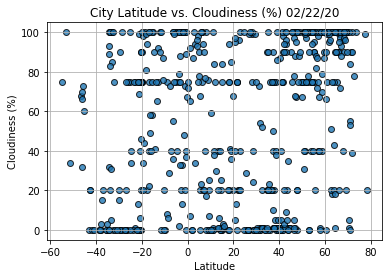

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

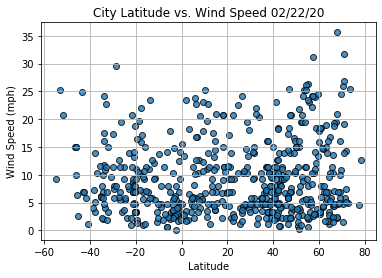

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import Matplotlib.
import matplotlib.pyplot as plt

In [79]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f'r value = {r_value}')

In [80]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

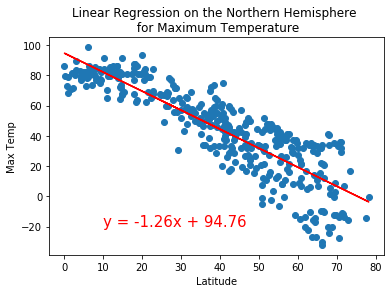

r value = -0.8667057591792897


In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,-20))

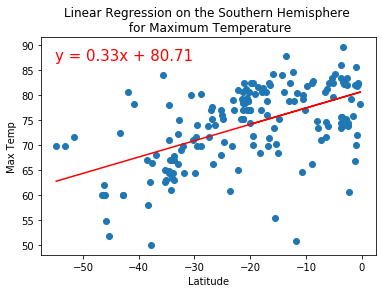

r value = 0.5505355395688669


In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-55,87))

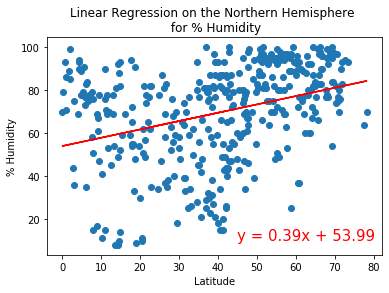

r value = 0.3372415742695275


In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(45,10))

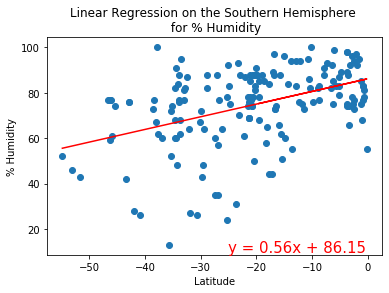

r value = 0.42656799901325687


In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-25,10))

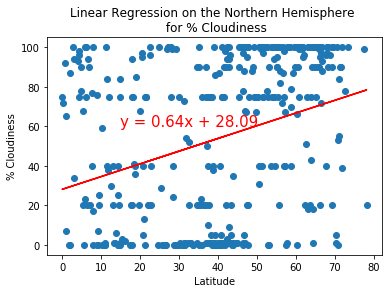

r value = 0.31489346118954664


In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(15,60))

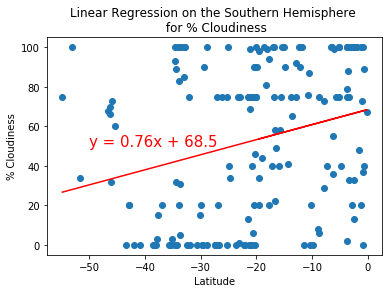

r value = 0.26320951025750217


In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,50))

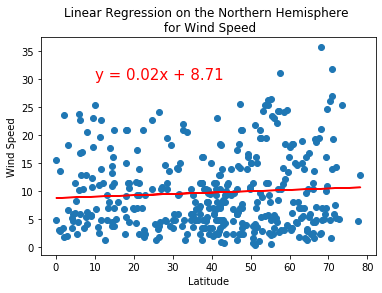

r value = 0.06994592763936487


In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,30))

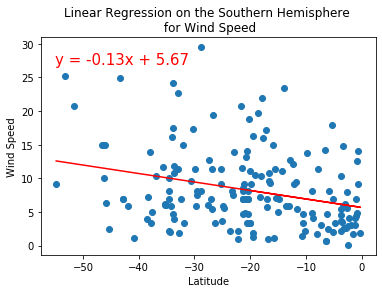

r value = -0.28900878197072916


In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,27))